In [1]:
import pathlib
import numpy as np
import scipy as sp
import pickle
import pandas as pd
from matplotlib import pyplot as plt

import SessionTools.two_photon as st2p 
import NeuromodPlasticity as nmp
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 
 

%matplotlib inline

In [2]:
pkldir = '/media/mplitt/SSD_storage/2P_scratch/DTE_EL_EPG_dual_color/PreProcDat'

with open(pkldir, 'rb') as f:
    data = pickle.load(f)

In [3]:
figfolder = pathlib.Path('/media/mplitt/SSD_storage/fig_scratch/DTE_EPG_EL_coimaging')
figfolder.mkdir(parents=True, exist_ok=True)

In [4]:
def print_nested_keys(data, indent=0):
    """Recursively prints the keys of a nested dictionary."""
    if isinstance(data, dict):
        for key, value in data.items():
           print("  " * indent + str(key))  # Print the key with indentation 
           print_nested_keys(value, indent + 1) 

In [5]:
print_nested_keys(data)

C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00001.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
    DF_R
    behavDat
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00002.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
    DF_R
    behavDat
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00003.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
    DF_R
    behavDat
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00004.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
    DF_R
    behavDat
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00005.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
 

In [6]:
flydirs = [k for k in data.keys()]



In [7]:
flynames = [f.split("\\")[-1] for f in flydirs]

In [8]:
channel_lookup = {}
for flydir in flydirs:
    channel_lookup[flydir]={}
    if 'G60D05RSS27' in flydir:
        channel_lookup[flydir]['EPG'] = 'DF_G'
        channel_lookup[flydir]['EL'] = 'DF_R'
    else:
        channel_lookup[flydir]['EPG'] = 'DF_R'
        channel_lookup[flydir]['EL'] = 'DF_G'

        

/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:501: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=[8,4])


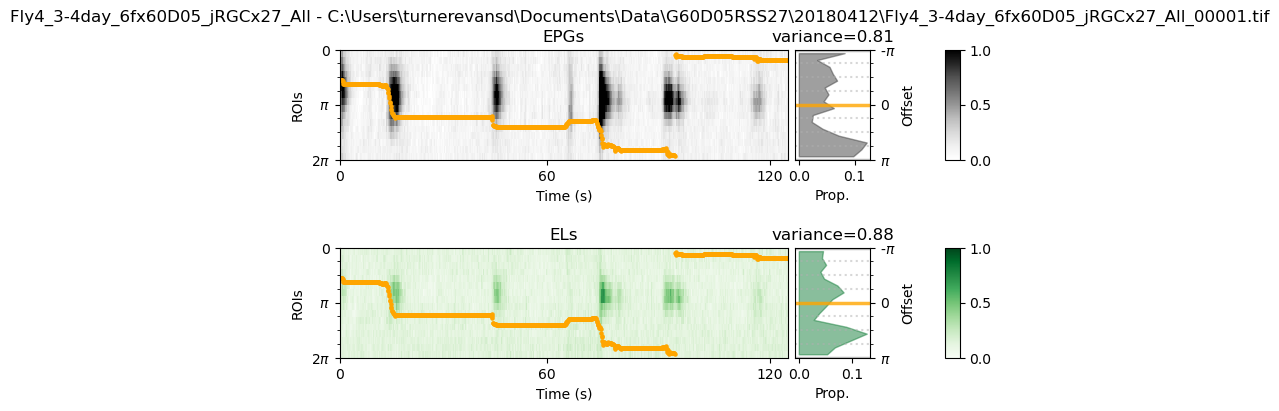

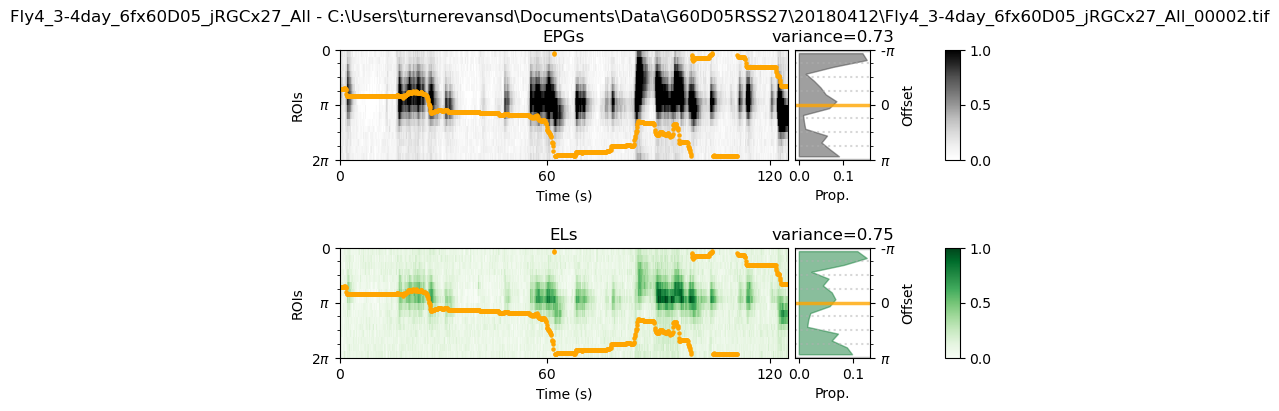

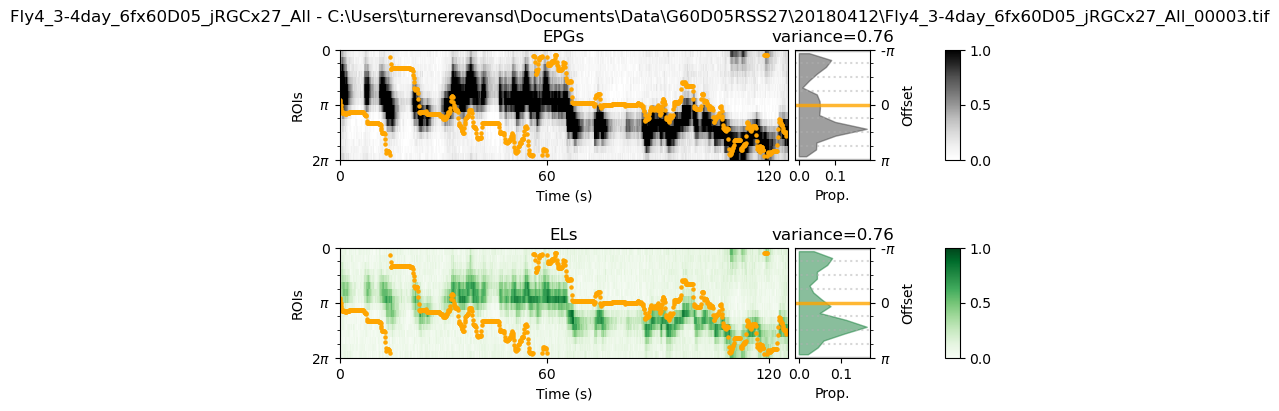

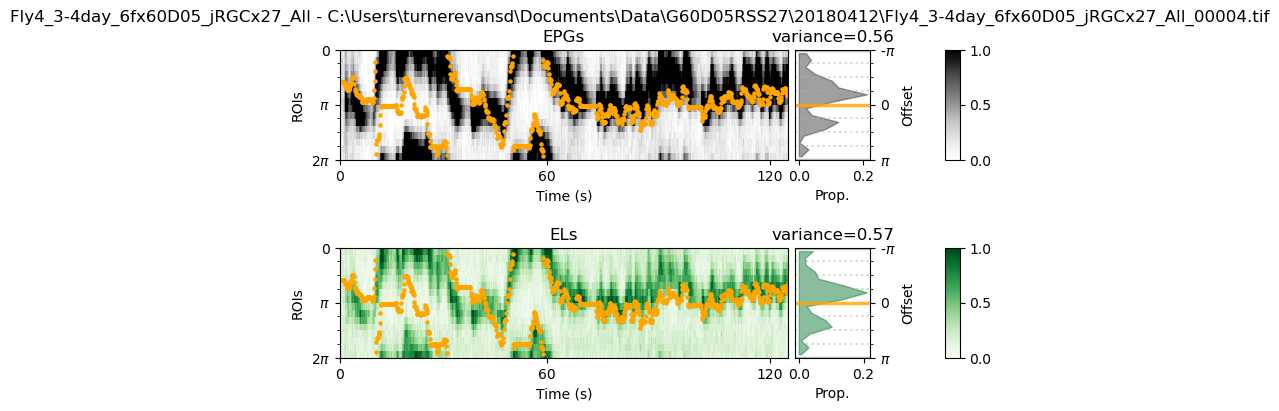

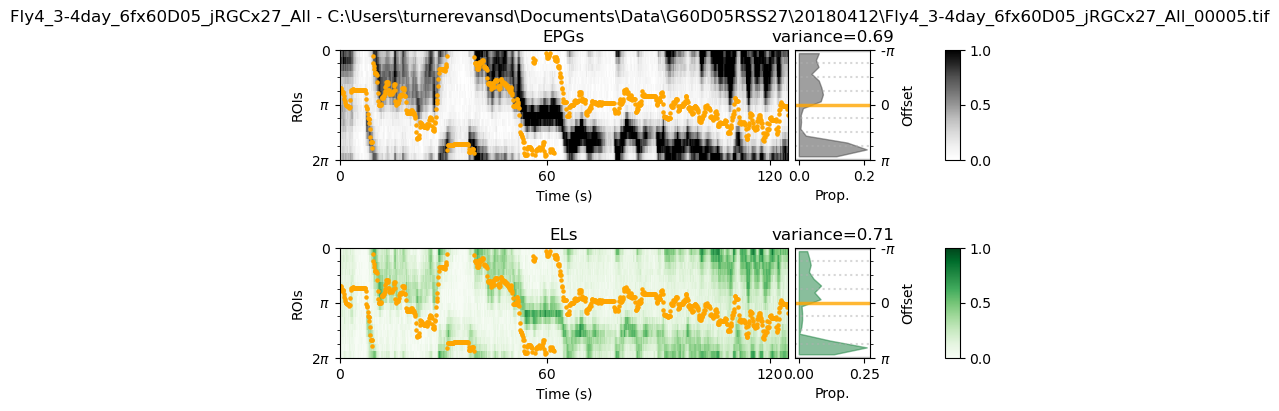

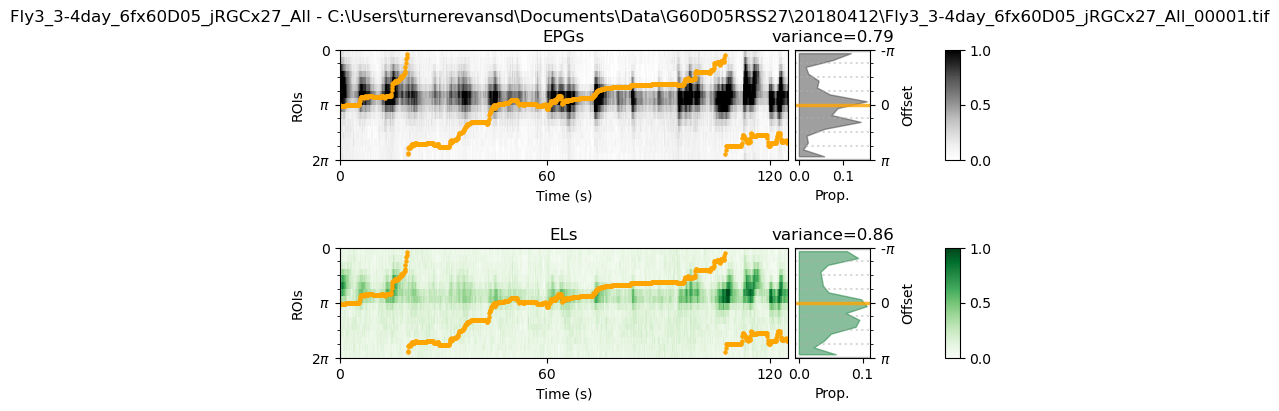

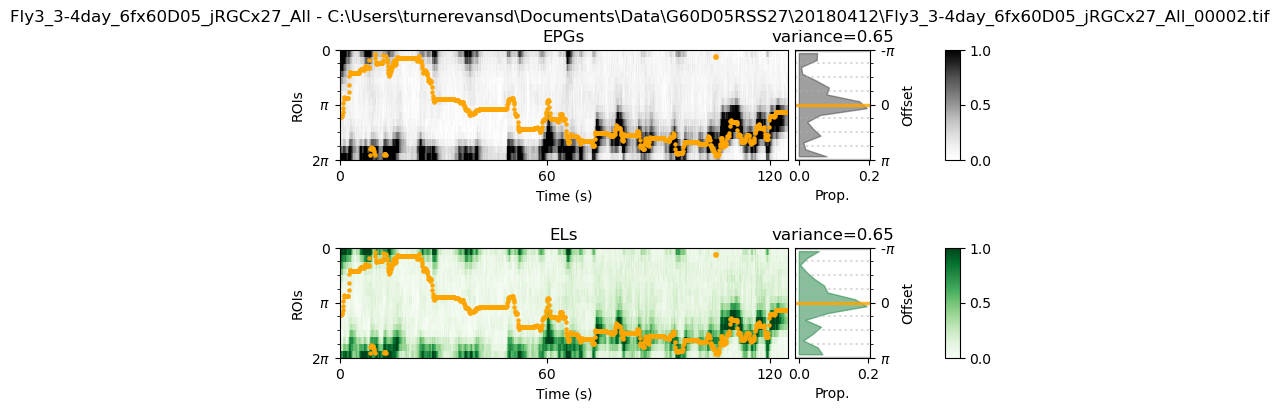

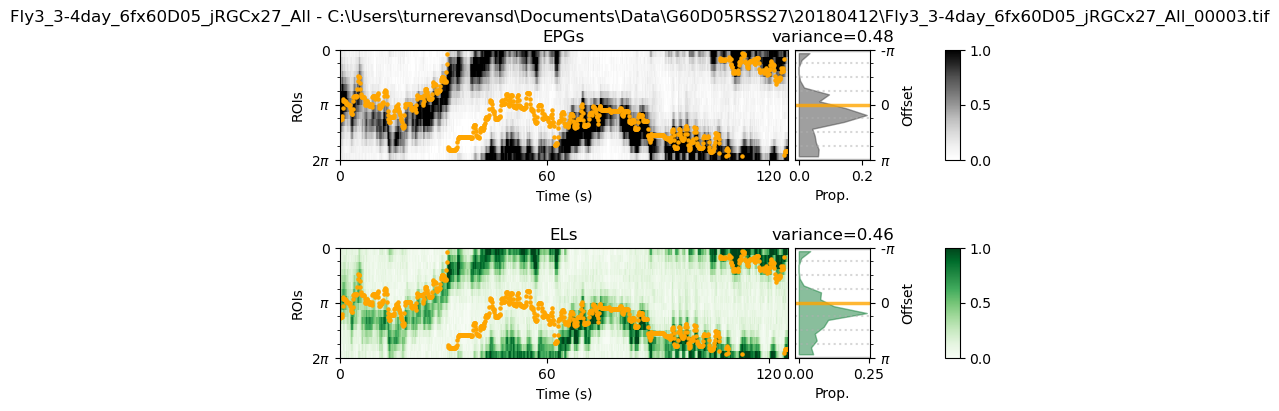

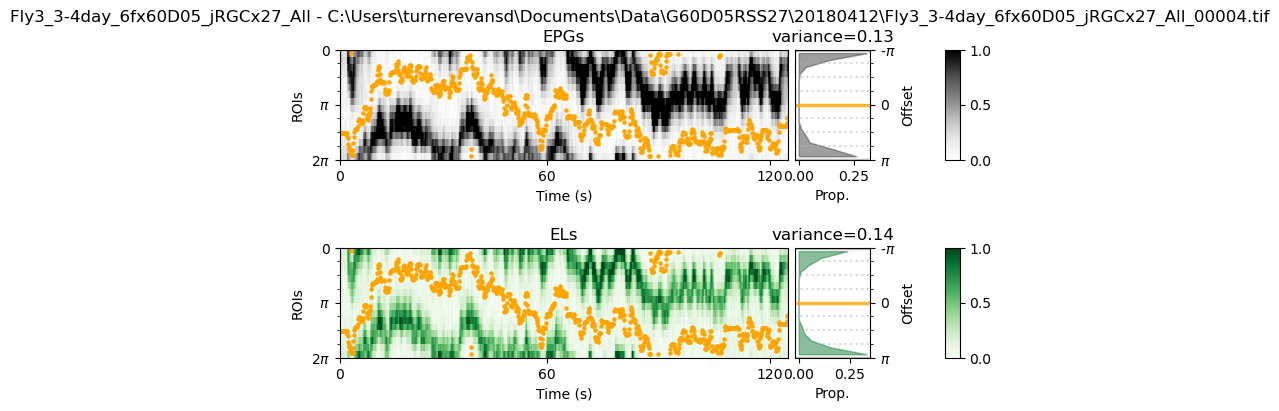

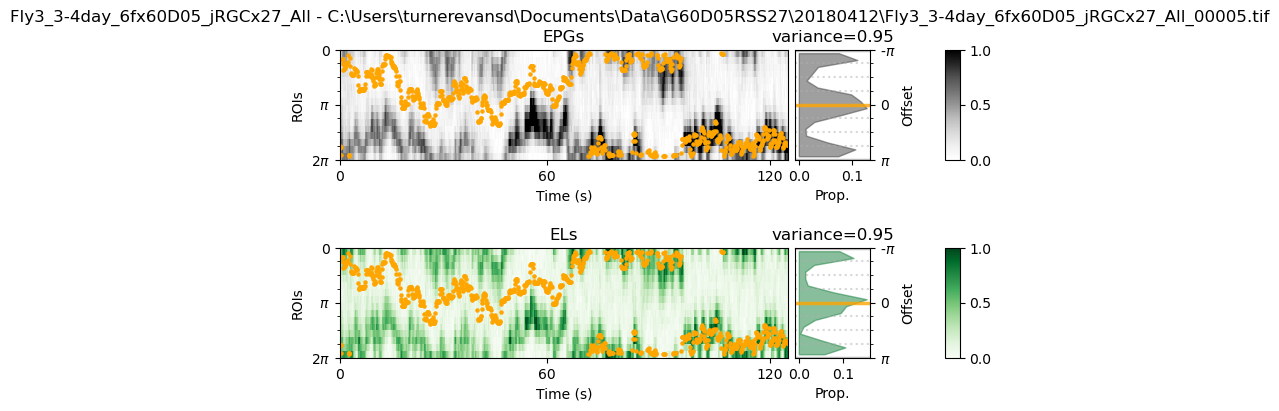

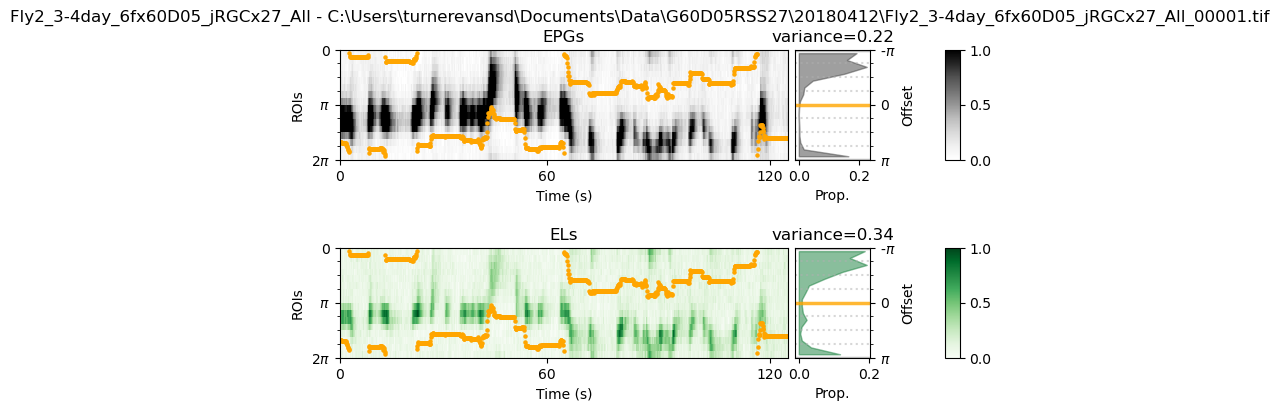

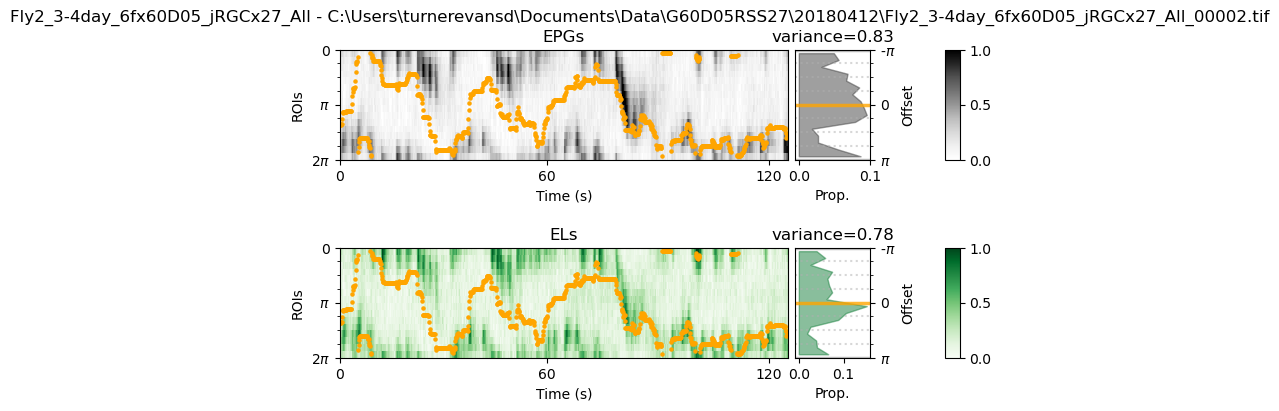

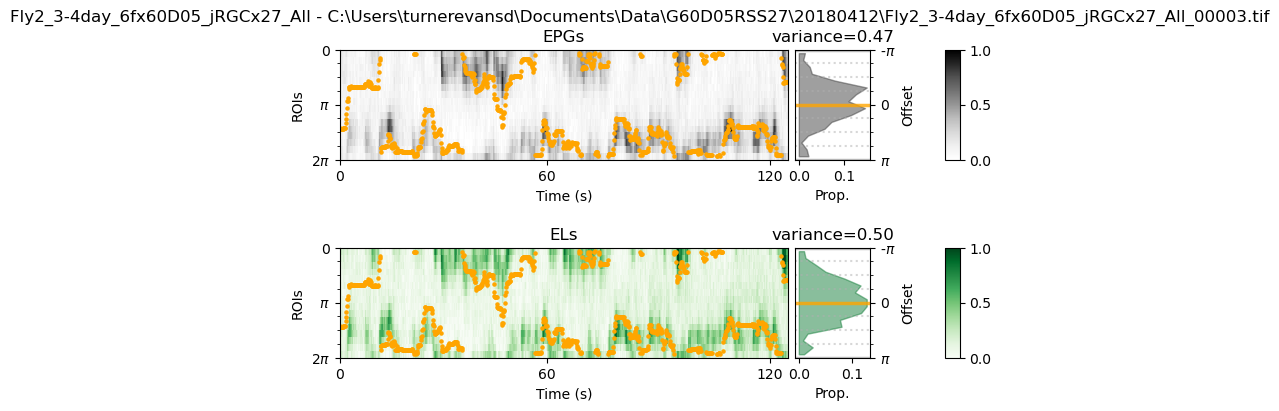

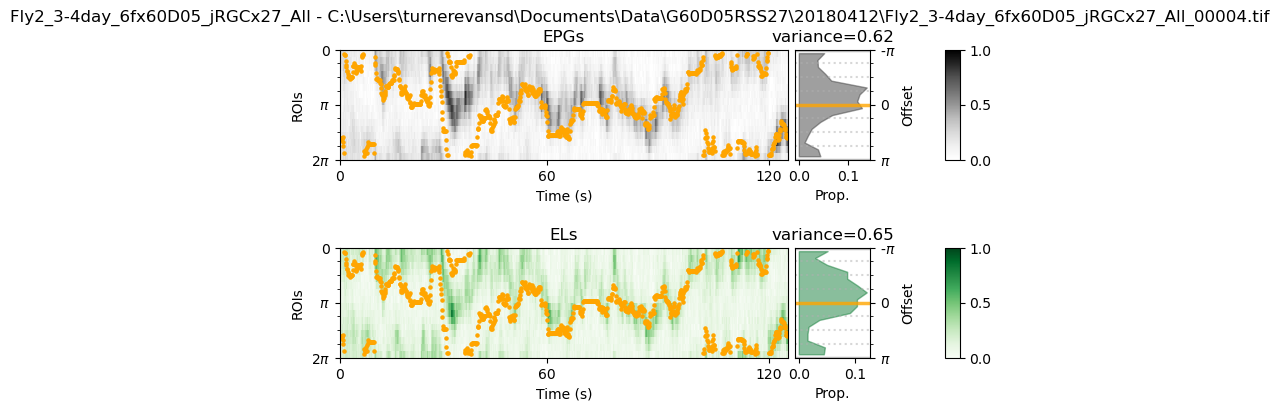

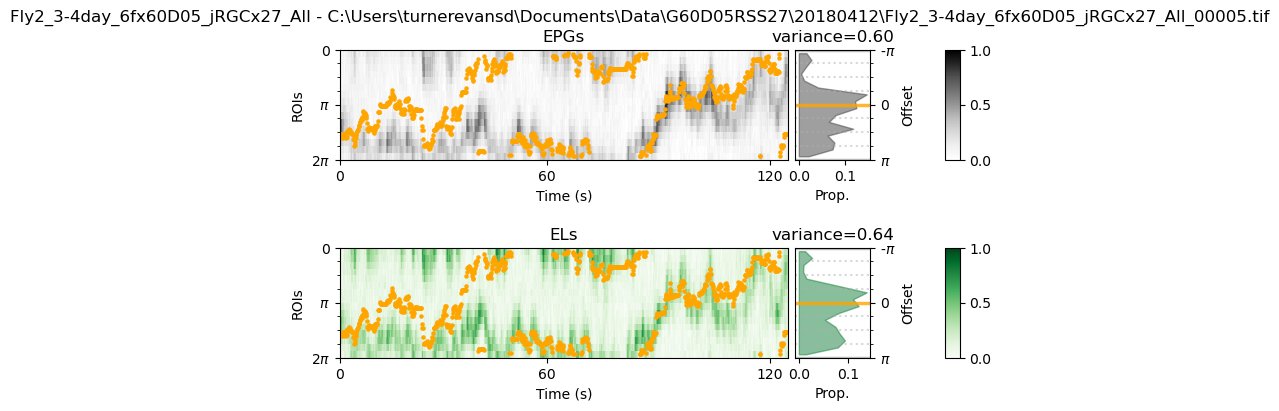

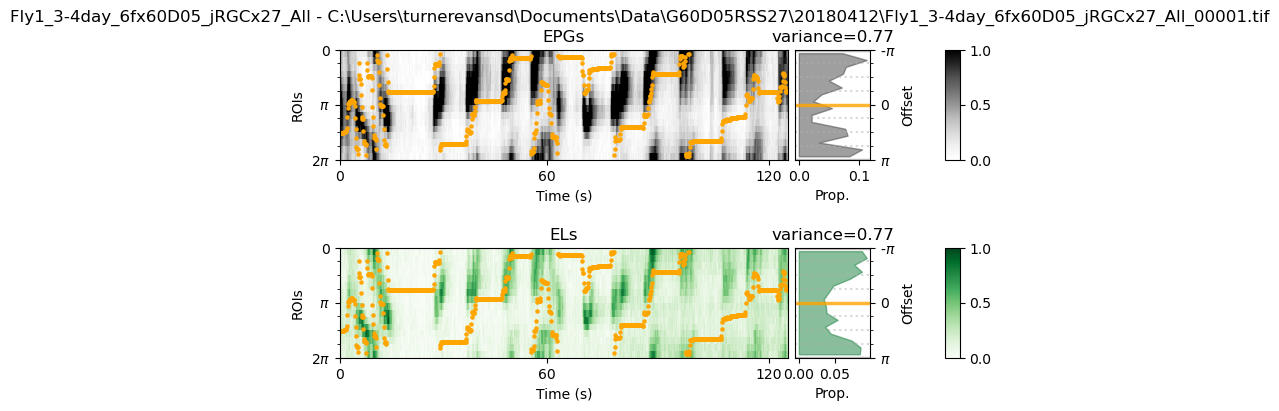

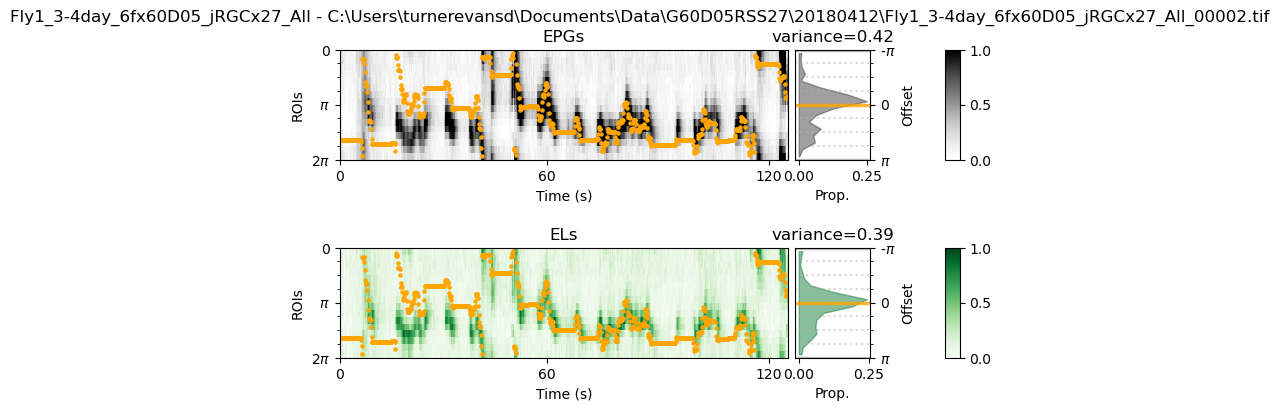

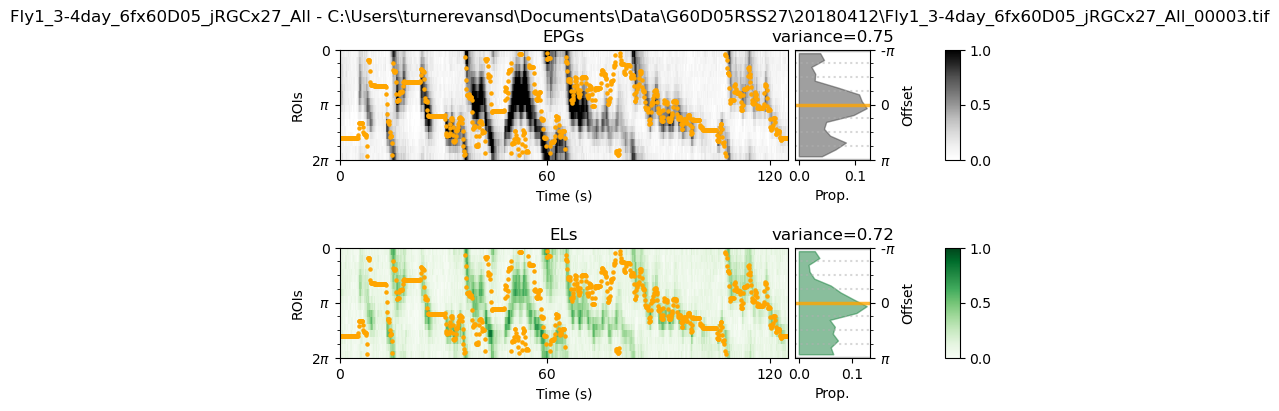

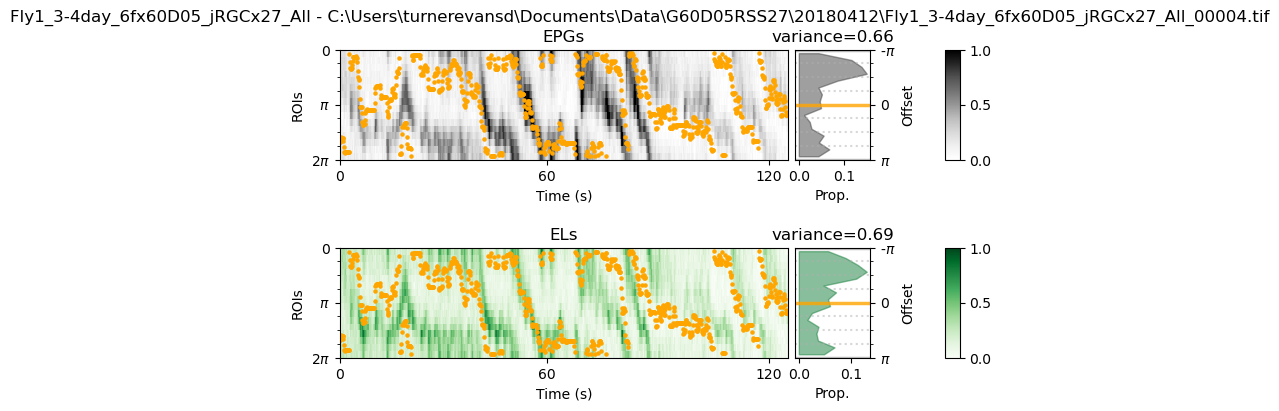

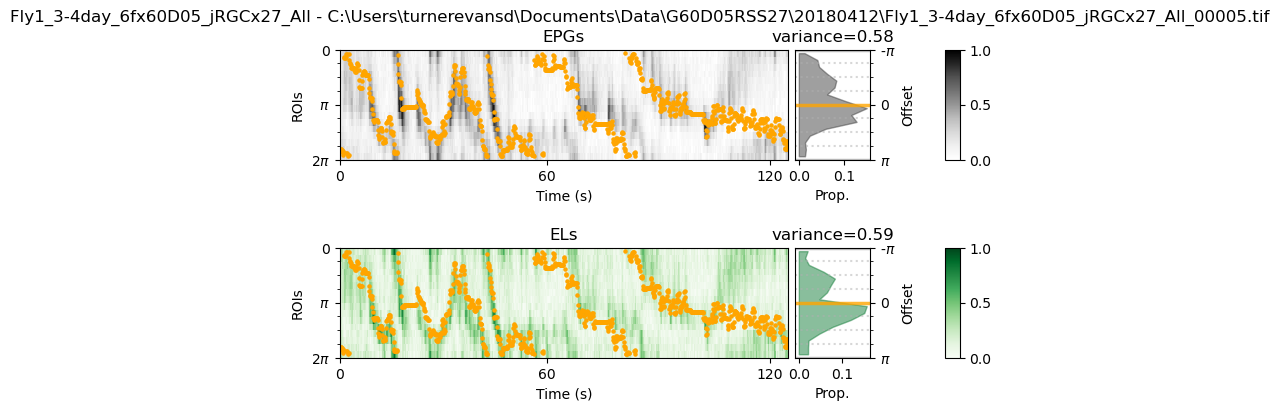

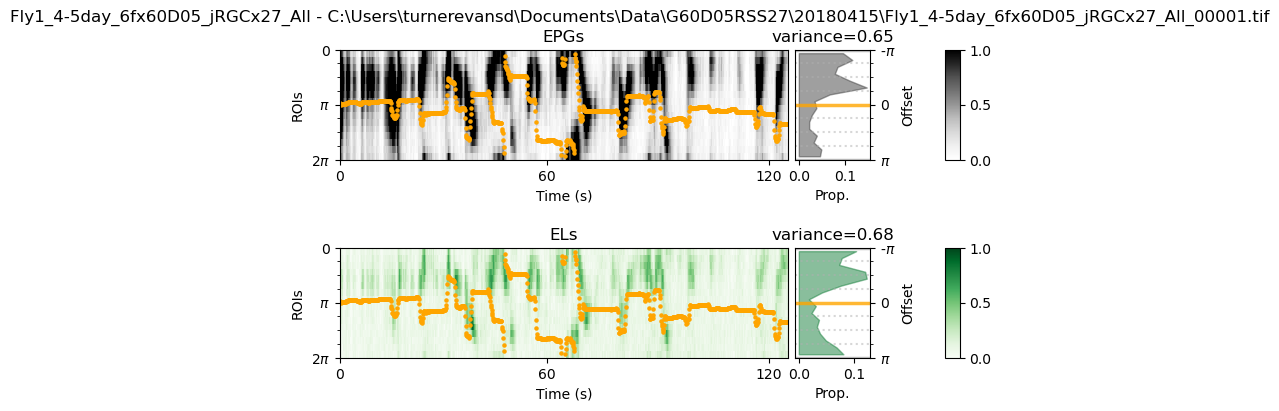

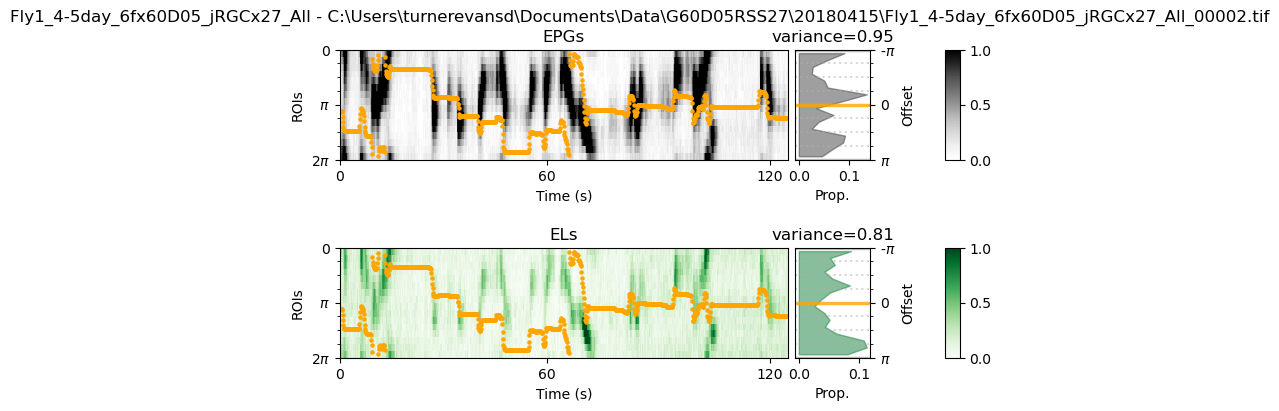

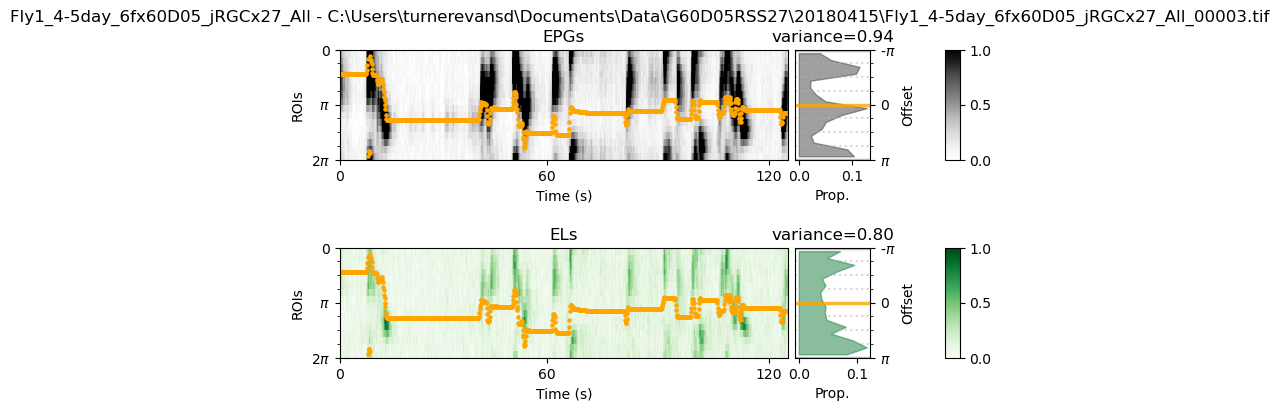

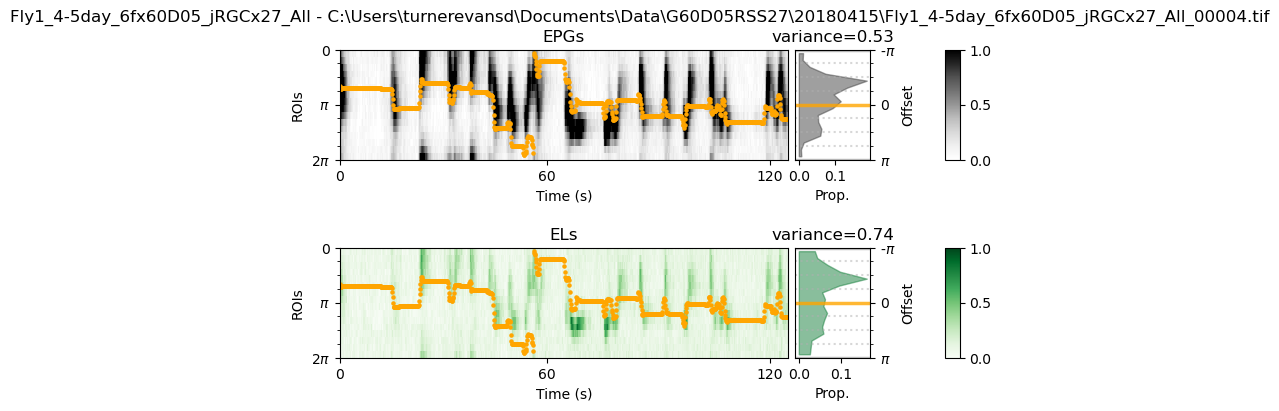

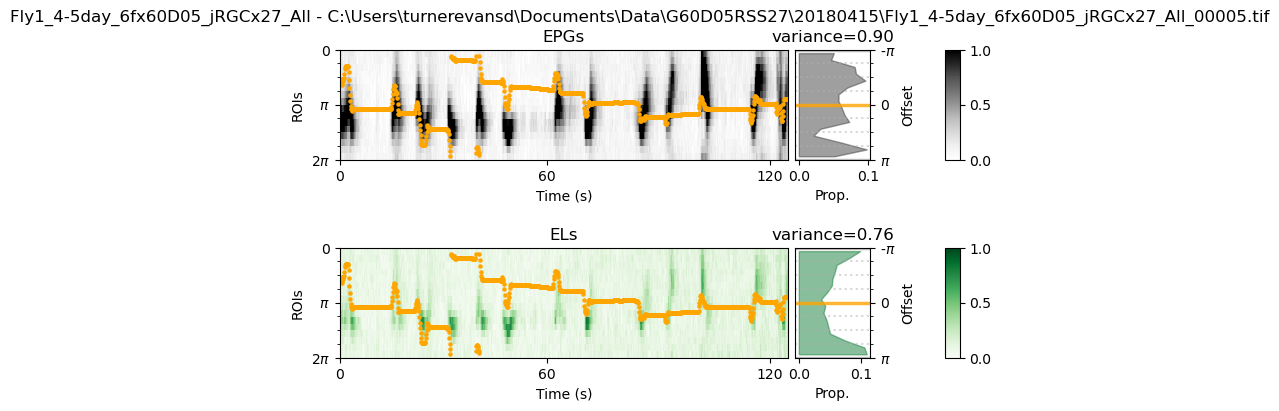

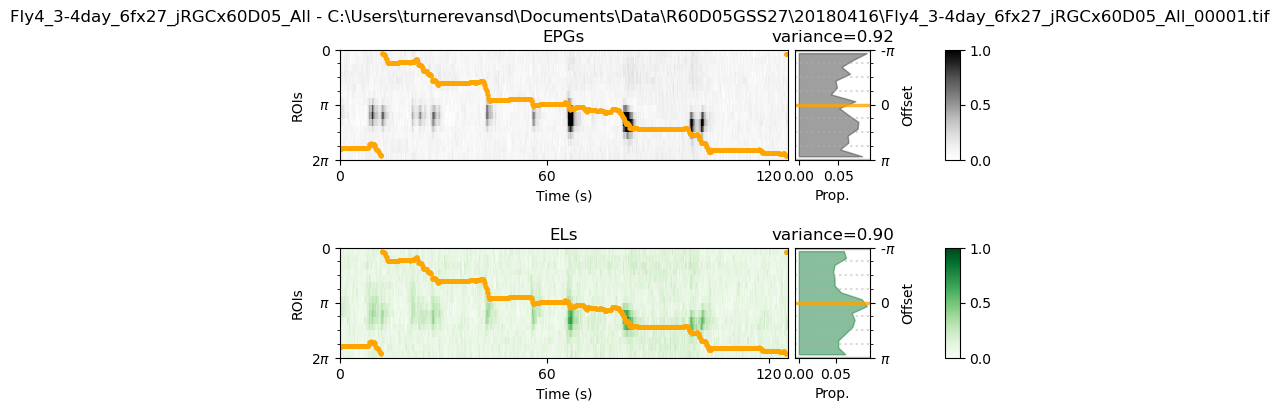

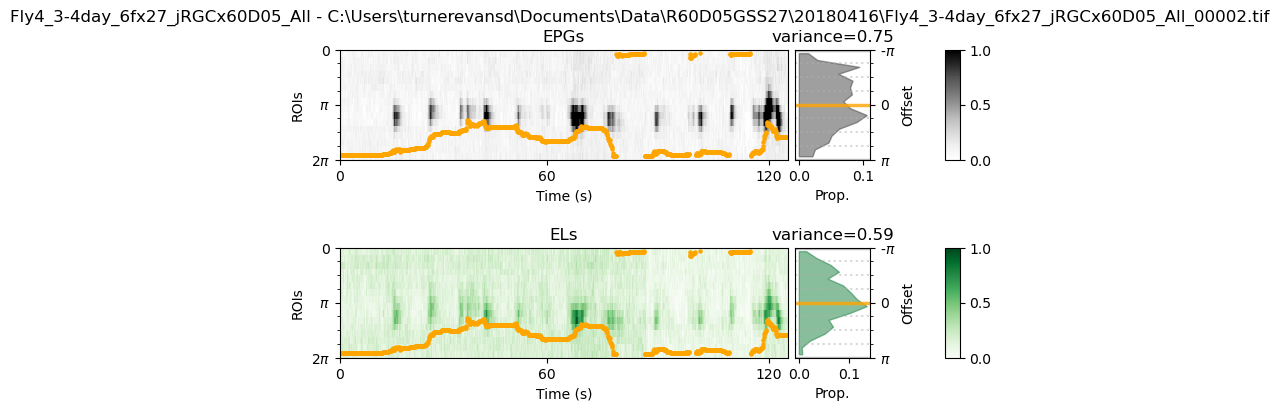

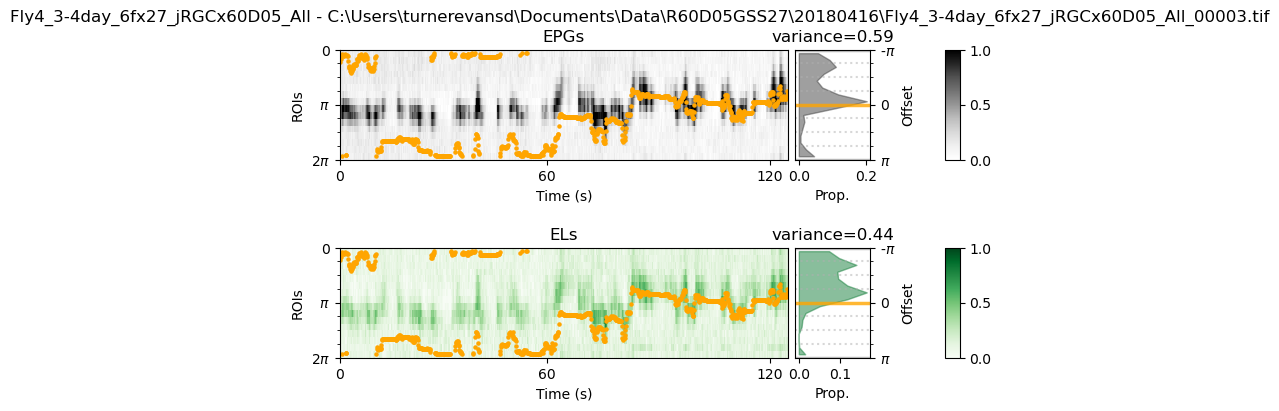

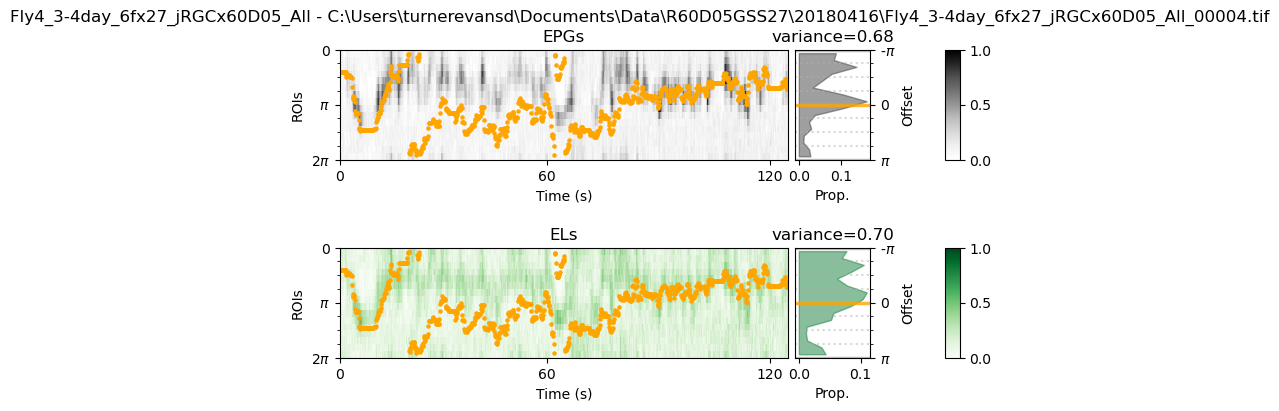

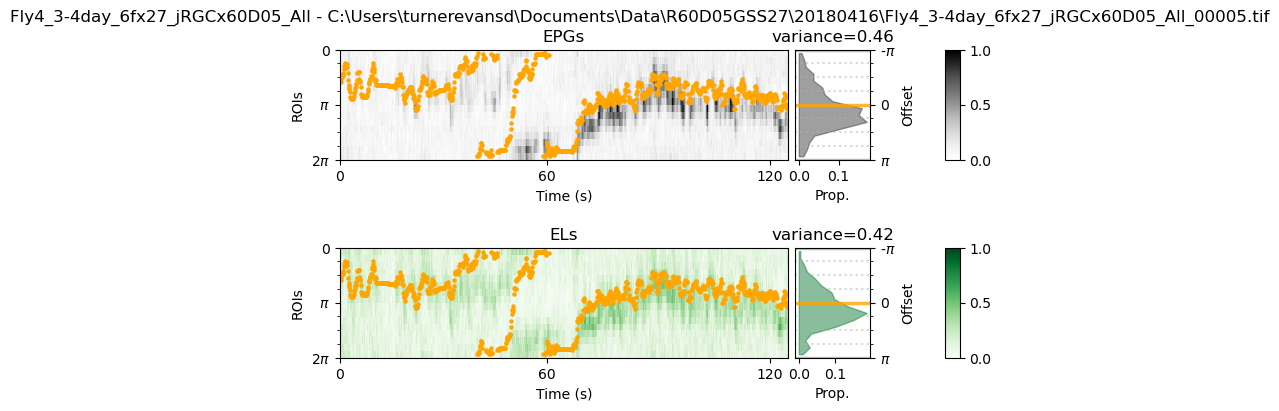

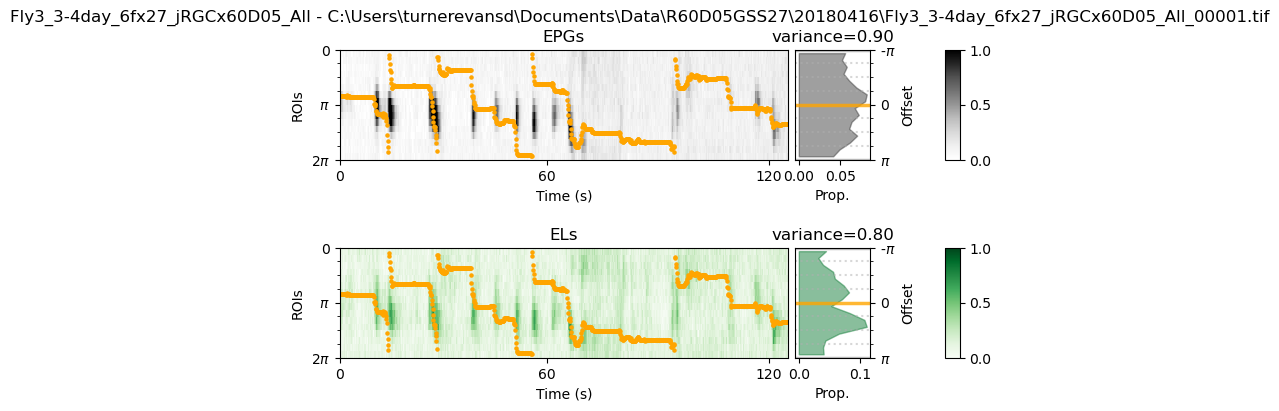

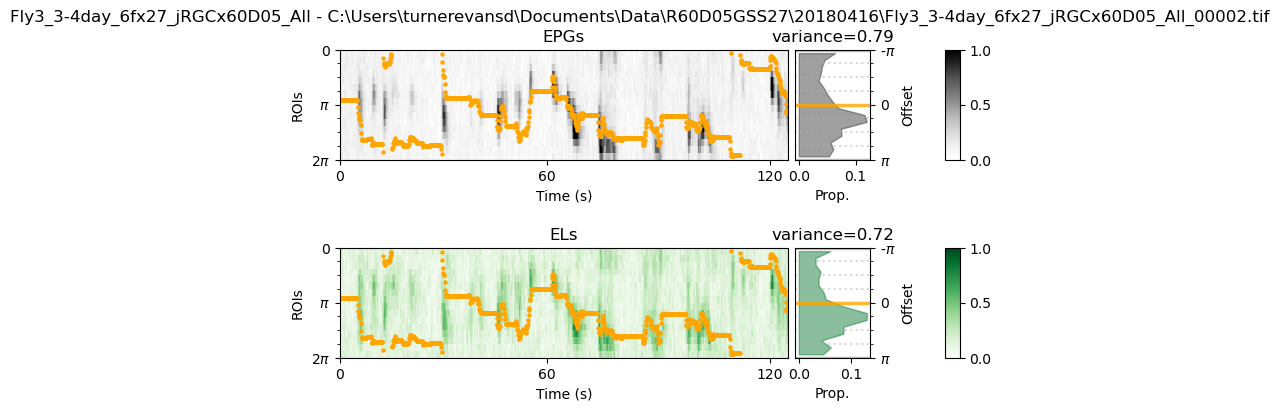

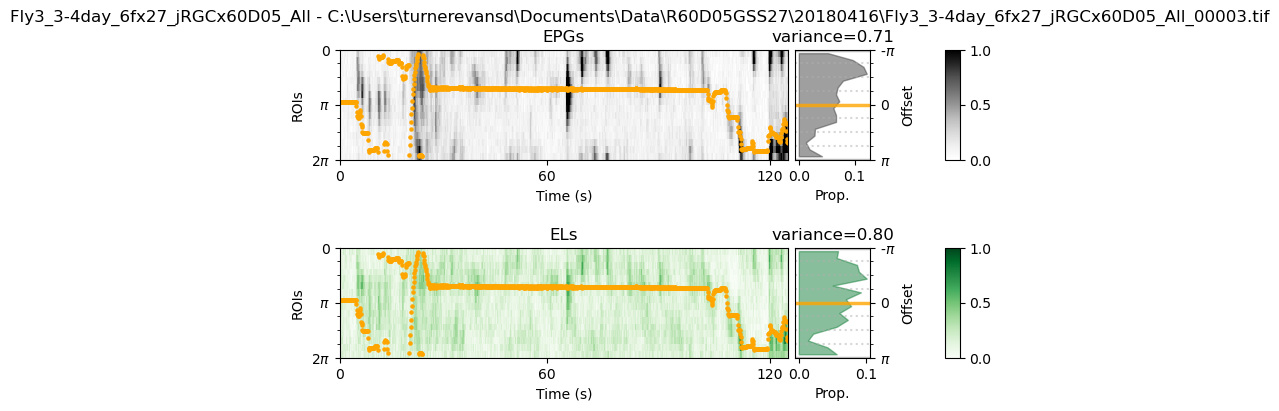

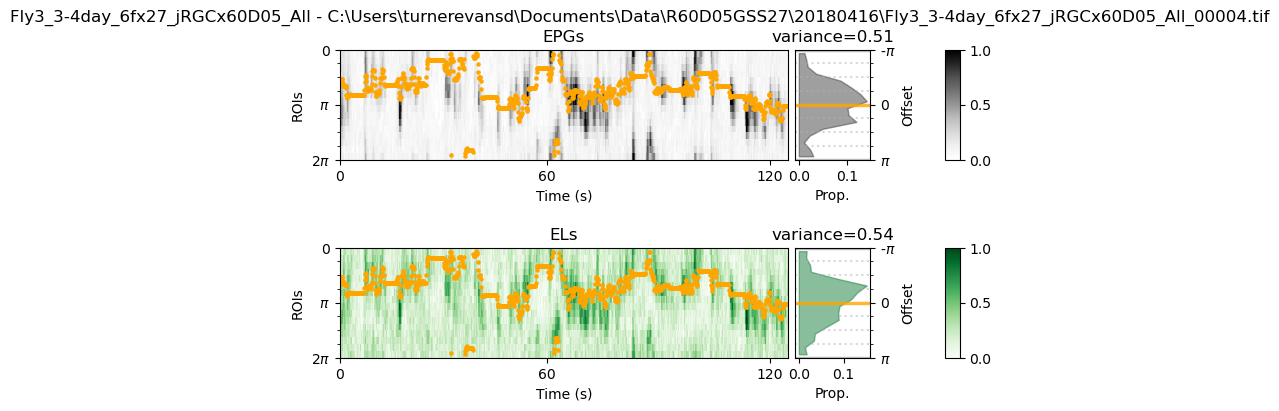

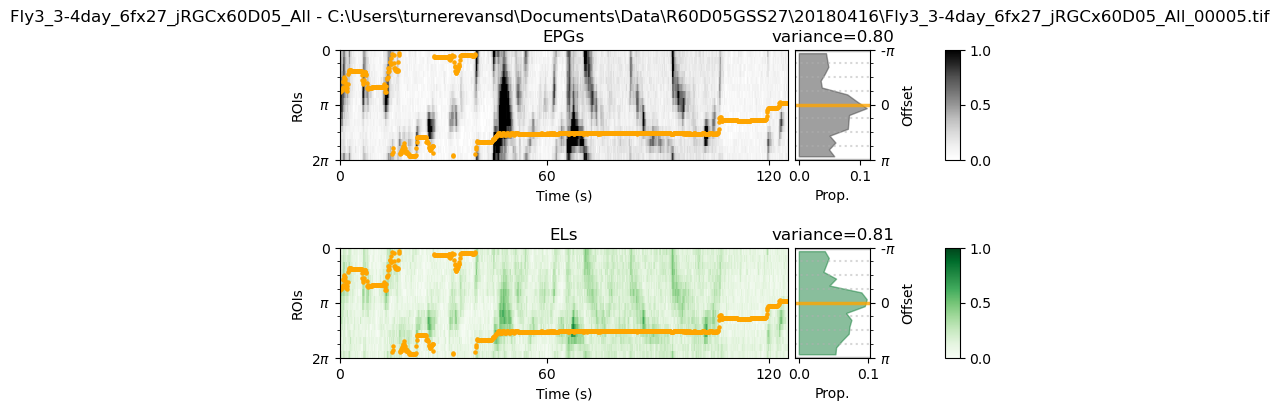

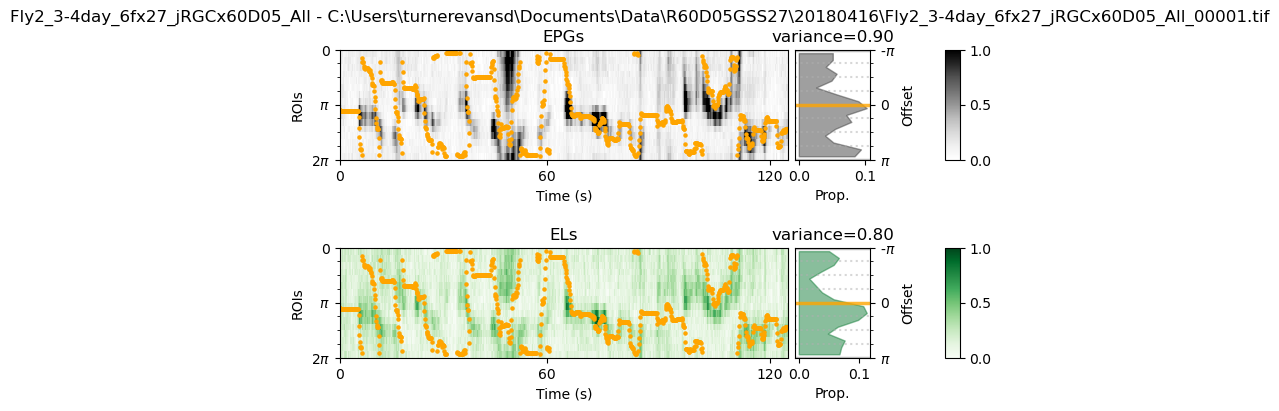

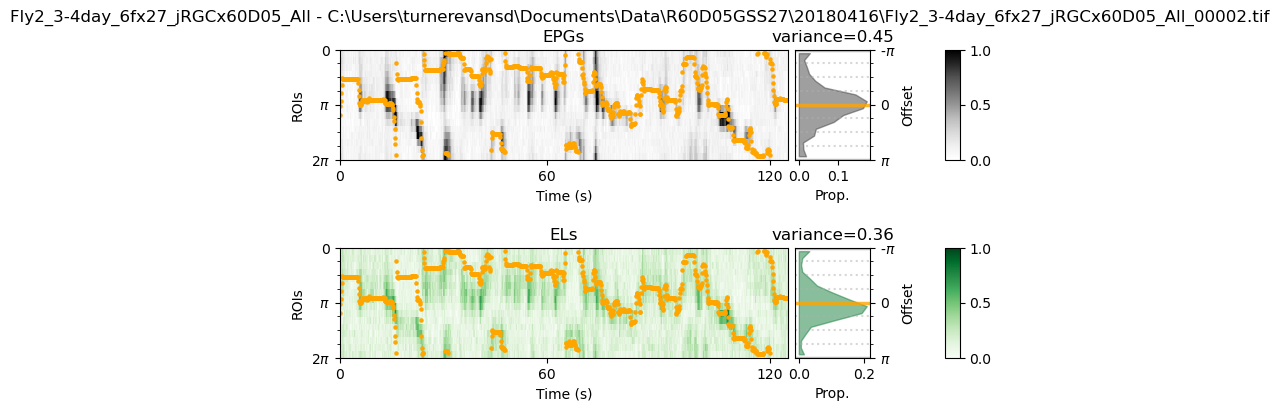

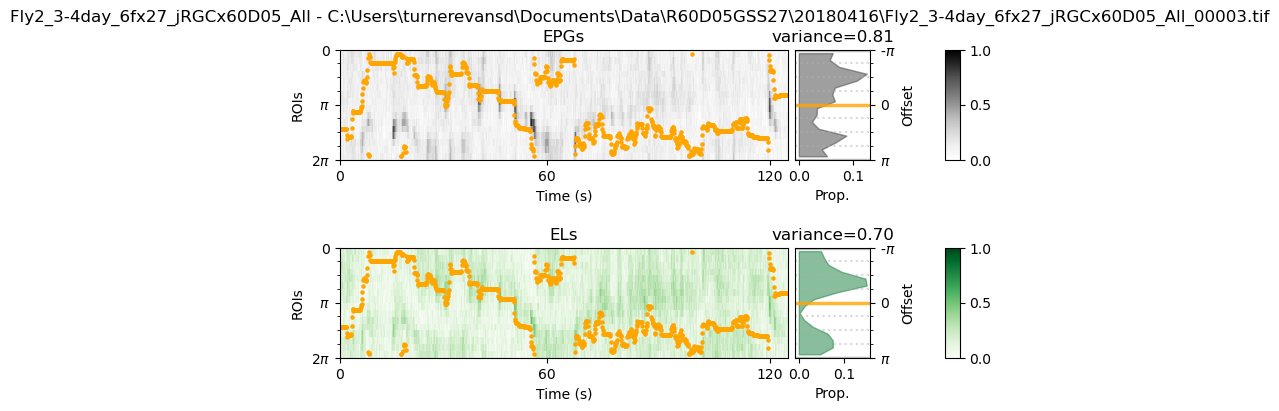

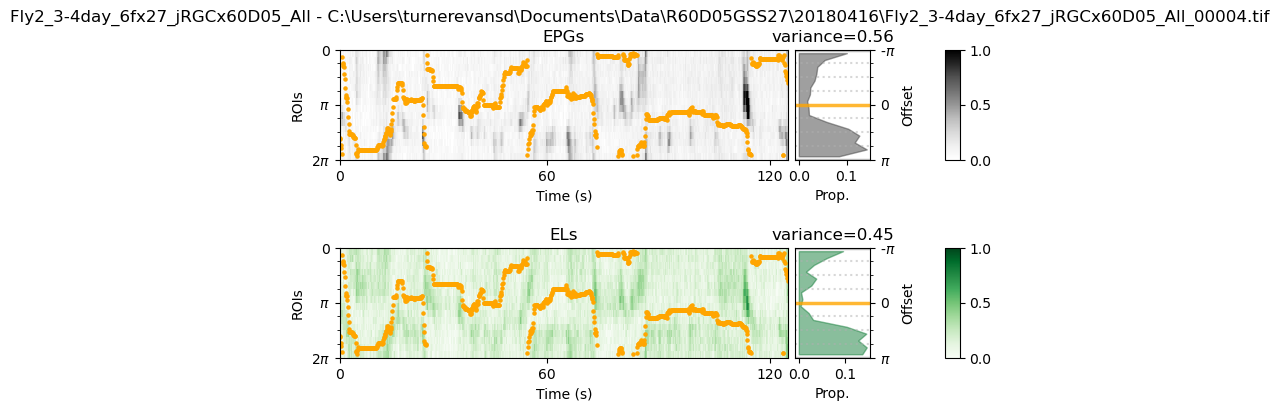

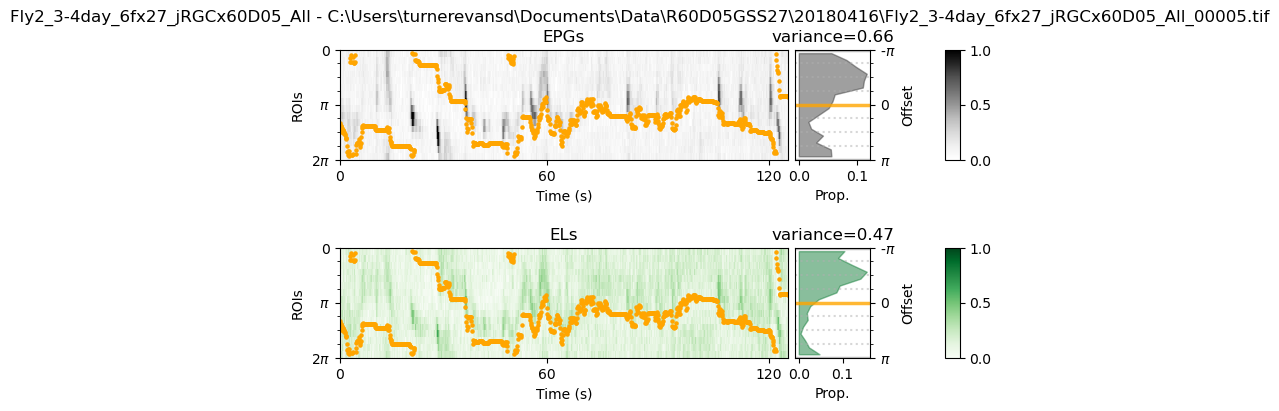

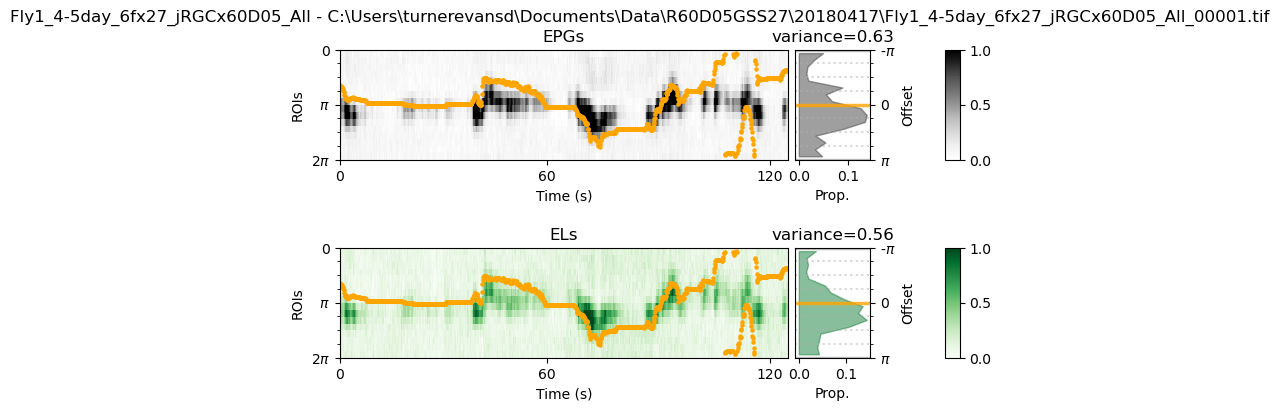

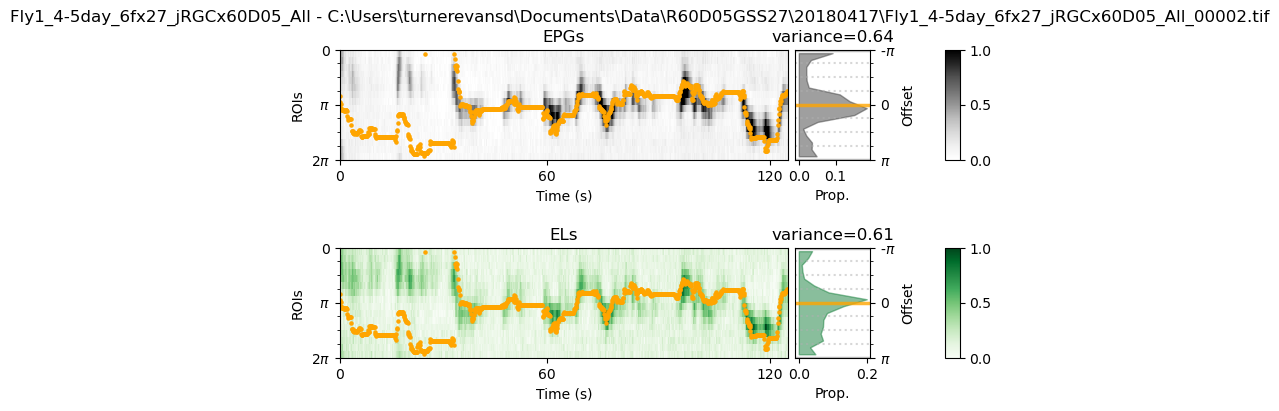

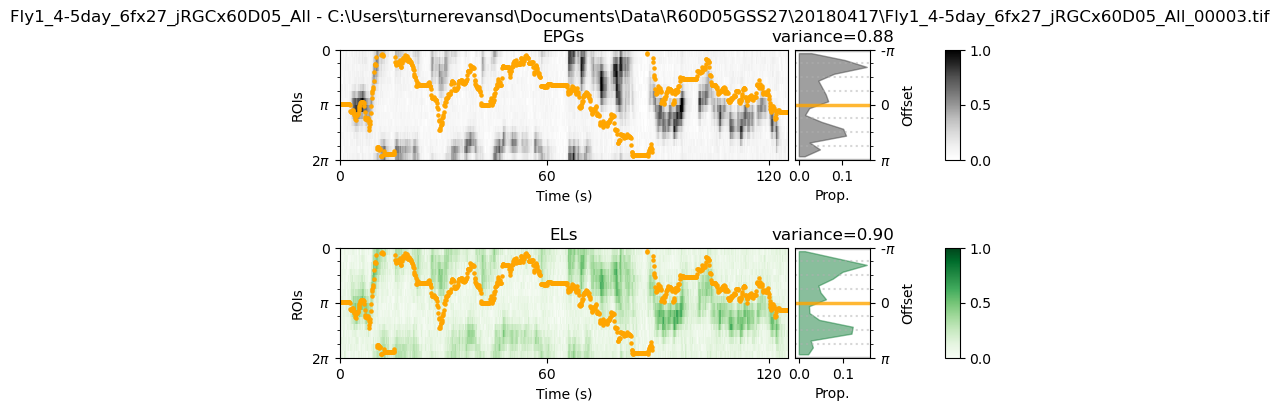

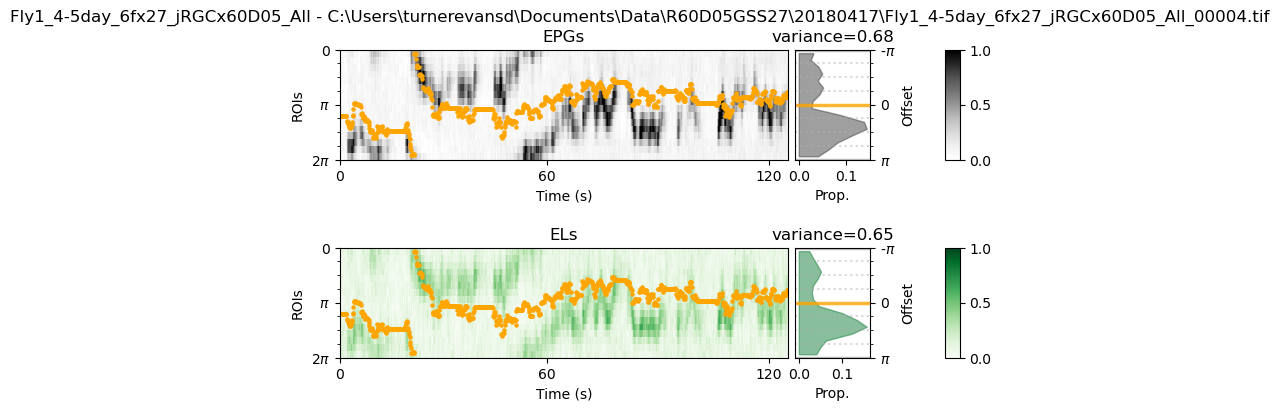

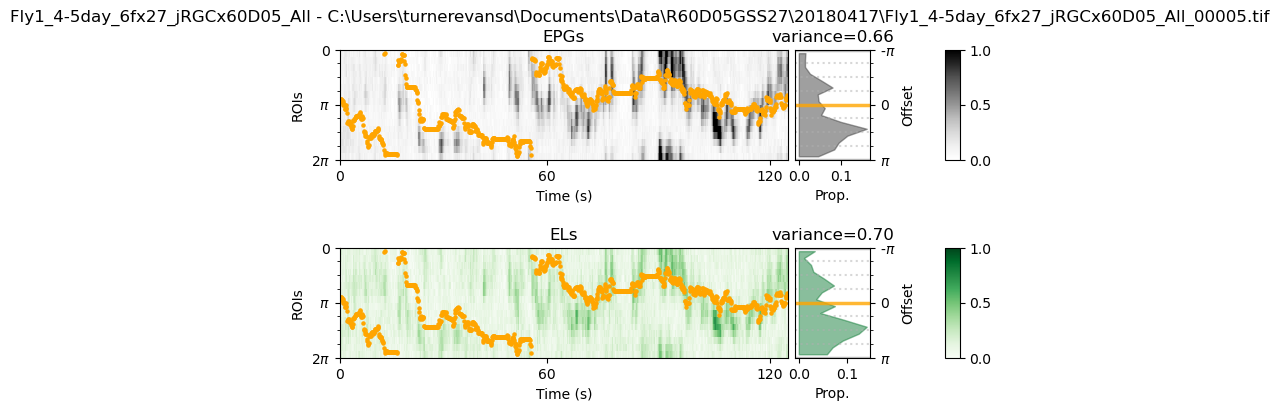

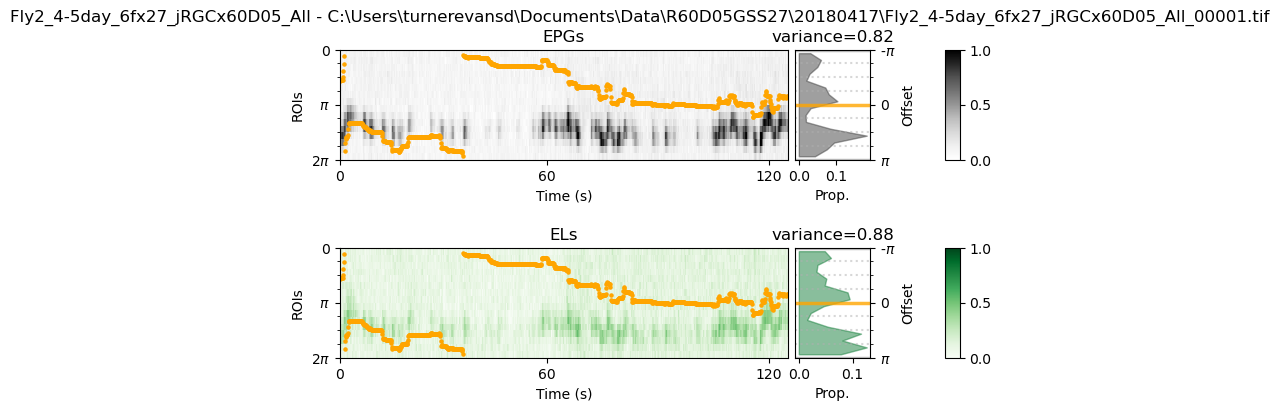

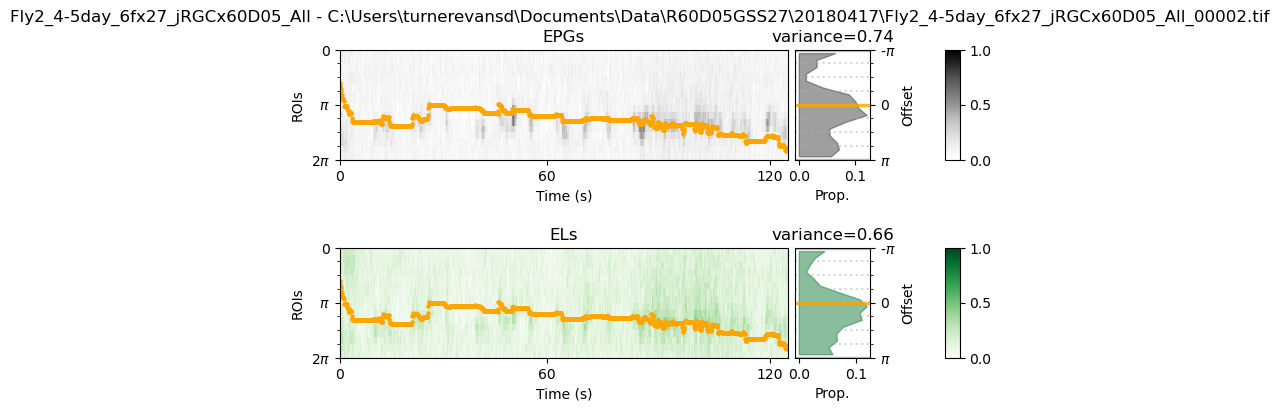

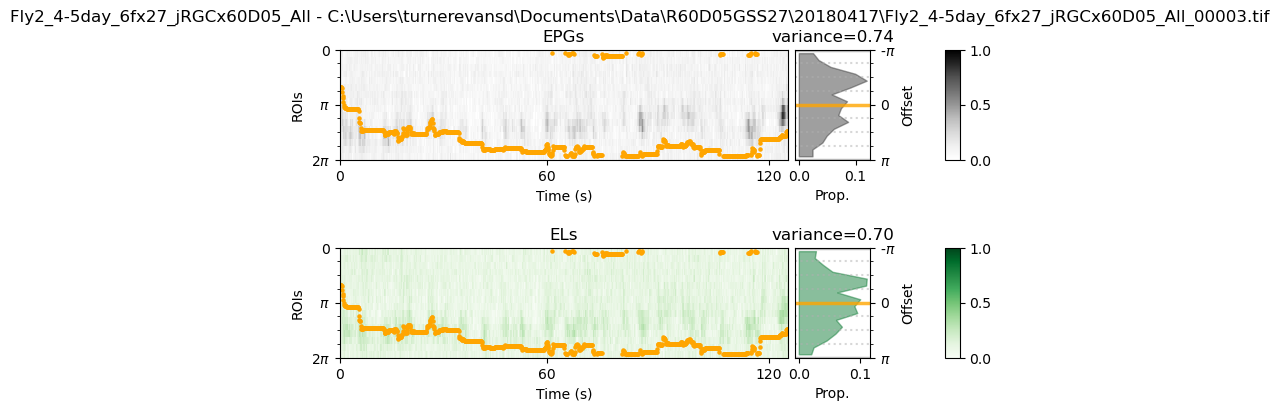

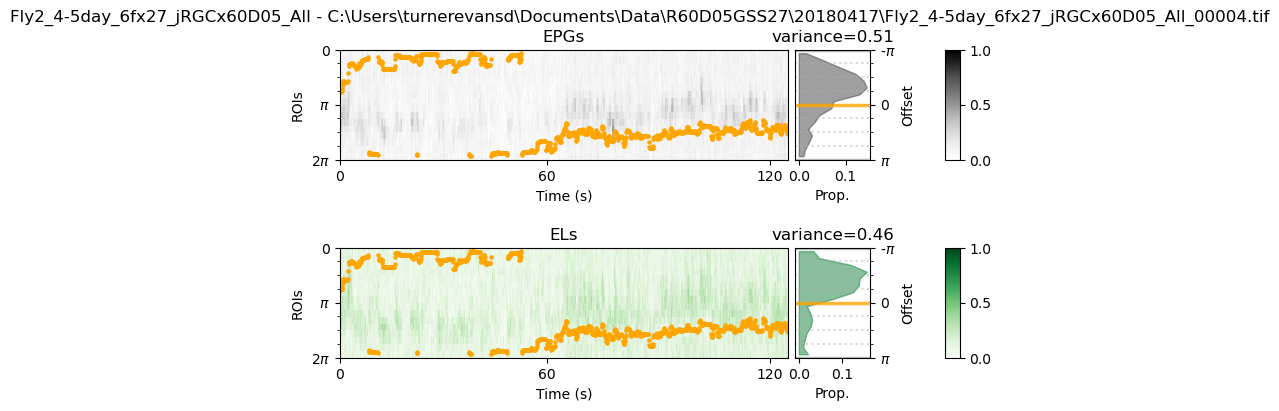

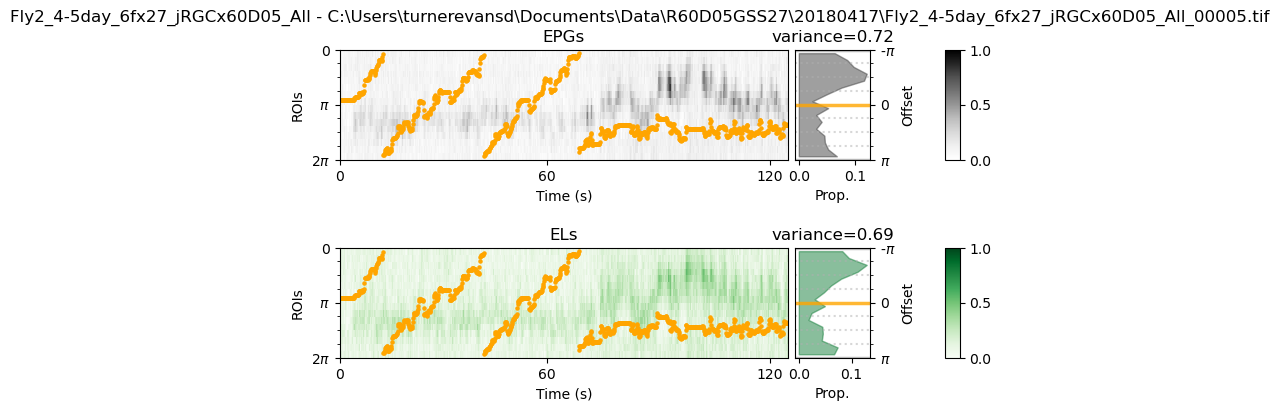

In [9]:
for f, fname in zip(flydirs, flynames):
    # print(f.split("\\")[-1])
    trial_names = [k for k in data[f].keys()]
    flydir = figfolder / fname
    flydir.mkdir(parents=True, exist_ok=True)
    for i, trial in enumerate(trial_names):
        # print(trial)
        ts = nmp.session.GetTS_DTE(data[f][trial], channel_lookup[f])
        fig, ax = nmp.dual_imaging.plot_sess_heatmaps_w_hist(ts, fname, trial, vmin=0, vmax=1)
        # fig, ax = nmp.dual_imaging.plot_sess_heatmaps(ts, f, trial,
        #                                             vmin=-.5, vmax=1)
    
    
        fig.savefig(flydir / f'{fname}_trial{i}_heatmaps.pdf')

In [10]:
stats_df = nmp.dual_imaging.offset_stats_DTE(data,  channel_lookup)
# stats_df
stats_df_unique = nmp.dual_imaging.offset_stats_unique(stats_df, cl_only=True)    
stats_df_unique = stats_df_unique[stats_df_unique['cl']==1]
stats_df_unique


/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:142: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats_df_unique['offset_ch1'].append(sp.stats.circmean(stats_df.loc[dark_mask, 'offset_ch1']))
/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:143: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats_df_unique['offset_ch2'].append(sp.stats.circmean(stats_df.loc[dark_mask, 'offset_ch2']))
/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:148: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats_df_unique['offset_diff'].append(sp.stats.circmean(stats_df.loc[dark_mask, 'offset_diff']))


fly_id  cl  offset_ch1  offset_ch2  \
0   Fly4_3-4day_6fx60D05_jRGCx27_All   1    2.910320    2.111591   
2   Fly3_3-4day_6fx60D05_jRGCx27_All   1    0.186556    0.518223   
4   Fly2_3-4day_6fx60D05_jRGCx27_All   1    5.851263    5.906005   
6   Fly1_3-4day_6fx60D05_jRGCx27_All   1    5.806475    6.083229   
8   Fly1_4-5day_6fx60D05_jRGCx27_All   1    4.918517    3.447313   
10  Fly4_3-4day_6fx27_jRGCx60D05_All   1    5.881243    5.969105   
12  Fly3_3-4day_6fx27_jRGCx60D05_All   1    0.080473    0.198243   
14  Fly2_3-4day_6fx27_jRGCx60D05_All   1    5.380825    4.927342   
16  Fly1_4-5day_6fx27_jRGCx60D05_All   1    0.782118    0.837733   
18  Fly2_4-5day_6fx27_jRGCx60D05_All   1    5.946971    5.576824   

    offset_var_ch1  offset_var_ch2  offset_diff  abs_offset_diff  pva_diff  \
0         0.707297        0.735683     0.057430         0.376796  0.443465   
2         0.602570        0.613506    -0.050406         0.186031  0.193752   
4         0.547274        0.580308     0.011881         0.274516  0.299763   
6         0.637132        0.630979    -0.059185         0.319638  0.350090   
8         0.794983        0.758902     0.026074         0.612445  0.713396   
10        0.678952        0.610848     0.117470         0.492661  0.547610   
12        0.743120        0.733254     0.034183         0.514222  0.597005   
14        0.675072        0.555676    -0.077392         0.517562  0.587706   
16        0.697710        0.683893     0.044645         0.332950  0.388040   
18        0.706827        0.677728     0.007849         0.593545  0.668328   

    fwhm_ch1  fwhm_ch2  
0   1.727876  1.335177  
2   1.492257  1.256637  
4   1.806416  1.649336  
6   1.806416  1.256637  
8   1.963495  1.178097  
10  1.178097  1.256637  
12  1.256637  1.256637  
14  1.178097  1.178097  
16  1.178097  1.649336  
18  1.178097  1.178097

0.0 0.001953125
DOF 9


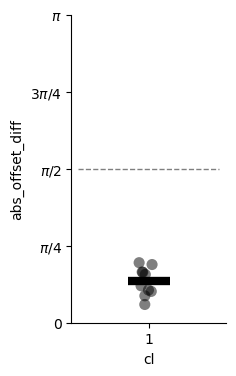

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=[2,4])

colors = ['black']
sns.stripplot(data=stats_df_unique, x='cl', 
              y='abs_offset_diff', dodge=False, alpha=.5,
              ax=ax, legend=False, palette=colors, hue='cl', 
              order = [1], s=8)
sns.pointplot(data=stats_df_unique, x = 'cl', y = 'abs_offset_diff',
               estimator=np.mean, linestyle='none', errorbar=None,
               marker="_", markersize=30, markeredgewidth=6,
              ax=ax, hue='cl', palette=colors, order = [1], legend=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
              labels=['0', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
ax.set_ylim([0, np.pi])
ax.hlines(np.pi/2, -0.5, .5, color='black', linestyle='--', linewidth=1,
          alpha=.5, zorder=-1)
fig.savefig(figfolder / "PVA_diff_sns.pdf")

t,p = sp.stats.wilcoxon(stats_df_unique['abs_offset_diff'] - np.pi/2)
print(t,p)
print(f"DOF {len(stats_df_unique['abs_offset_diff']) - 1}")

In [13]:
dh_bins = np.linspace(-np.pi, np.pi, num=11)
stats_df = nmp.dual_imaging.rho_stats_DTE(data, channel_lookup, dh_bins, abs=False)

grouped_rho1 = stats_df.groupby(['fly_id','cl'])['rho1_dig'].apply(lambda x: np.nanmean(np.stack(x),axis=0)).reset_index()
grouped_rho2 = stats_df.groupby(['fly_id','cl'])['rho2_dig'].apply(lambda x: np.nanmean(np.stack(x),axis=0)).reset_index()
grouped_rho1.head()

grouped_pvd = stats_df.groupby(['fly_id', 'cl'])['pva_diff'].apply(lambda x: np.nanmean(np.stack(x),axis=0)).reset_index()


/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:215: RuntimeWarning: Mean of empty slice.
  rho1_dig = np.array([ts.rho[0, dh_dig == i].mean() for i in range(len(dh_bins))])
/home/mplitt/mambaforge/envs/NeuroModPlasticity/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:218: RuntimeWarning: Mean of empty slice.
  rho2_dig = np.array([ts.rho[1, dh_dig == i].mean() for i in range(len(dh_bins))])
/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:225: RuntimeWarning: Mean of empty slice.
  pva_diff = np.array([pvd[dh_dig==i].mean() for i in range(len(dh_bins))])
/tmp/ipykernel_2725725/3162942249.py:4: RuntimeWarning: Mean of empty slice
  grouped_rho1 = stats_df.groupby(['fly_id','cl'])['rho1_dig'].apply(lambda x: np.nanmean(np.stack(x),axis=0)).reset_index()
/tmp/ipyk

Text(0.5, 0, 'rot. speed (rad/s)')

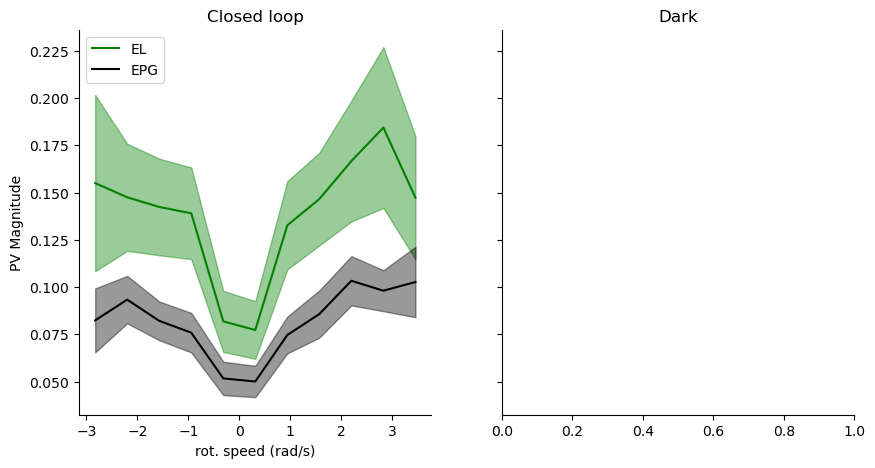

In [14]:
dh_bin_centers = dh_bins+np.diff(dh_bins)[0]/2

fig,ax = plt.subplots(1,2,sharey=True, figsize=[10,5])

rho1_dig = np.stack(grouped_rho1.loc[grouped_rho1['cl']==1,'rho1_dig'])
mu, sem = np.nanmean(rho1_dig, axis=0), sp.stats.sem(rho1_dig, axis=0, nan_policy='omit')
ax[0].plot(dh_bin_centers, mu, color='green', label='EL')
ax[0].fill_between(dh_bin_centers, mu-sem, mu+sem, color='green', alpha=.4)

rho2_dig = np.stack(grouped_rho2.loc[grouped_rho2['cl']==1,'rho2_dig'])
mu, sem = np.nanmean(rho2_dig, axis=0), sp.stats.sem(rho2_dig, axis=0, nan_policy='omit')
ax[0].plot(dh_bin_centers, mu, color='black', label='EPG')
ax[0].fill_between(dh_bin_centers, mu-sem, mu+sem, color='black', alpha=.4)



ax[0].legend()


for _ax in ax:
    _ax.spines['top'].set_visible(False)
    _ax.spines['right'].set_visible(False)

ax[0].set_title('Closed loop')
ax[1].set_title('Dark')
ax[0].set_ylabel('PV Magnitude')
ax[0].set_xlabel('rot. speed (rad/s)')

0.8081194048495176 7.258459713309018e-23


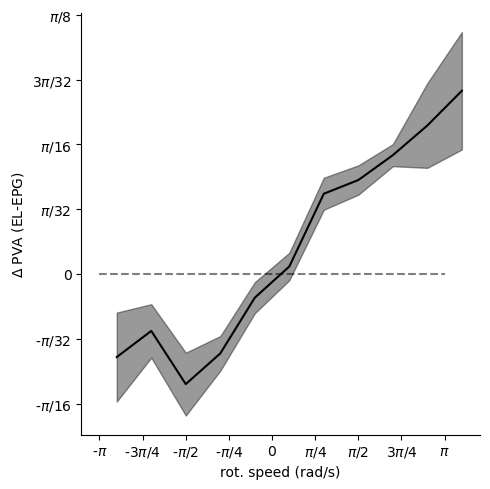

In [15]:
fig,ax = plt.subplots(sharey=True, figsize=[5,5])
dh_bin_centers_deg = dh_bin_centers*180/np.pi
pvd_dig = np.stack(grouped_pvd.loc[grouped_pvd['cl']==1,'pva_diff'])
mu, sem = np.nanmean(pvd_dig, axis=0), sp.stats.sem(pvd_dig, axis=0, nan_policy='omit')
ax.plot(dh_bin_centers, mu, color='black')
ax.fill_between(dh_bin_centers, mu-sem, mu+sem, color='black', alpha=.4)

_ = ax.set_yticks([ -np.pi/16, -np.pi/32, 0, np.pi/32, np.pi/16, 3*np.pi/32, np.pi/8], 
                  labels=[  r"-$\pi$/16", r"-$\pi$/32", 0, r"$\pi$/32", r"$\pi$/16", r"3$\pi$/32", r"$\pi$/8"])

_ = ax.set_xticks([-np.pi,-3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi], 
                  labels=[  r"-$\pi$", r"-3$\pi$/4", r"-$\pi$/2", r"-$\pi$/4", 0, r"$\pi$/4", r"$\pi$/2", r"3$\pi$/4", r"$\pi$"])



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.set_ylabel(r'$\Delta$ PVA (EL-EPG)')
ax.set_xlabel('rot. speed (rad/s)')
ax.plot([-np.pi,np.pi], [0,0], 'k--', alpha=.5, zorder=-1)

fig.tight_layout()

fig.savefig(figfolder / 'PVA_diff_v_speed.pdf', format='pdf')

r, p = sp.stats.spearmanr(pvd_dig.ravel(), (dh_bin_centers[np.newaxis,:]*np.ones_like(pvd_dig)).ravel(), nan_policy='omit')
print(r,p)

In [54]:
def shift_by_max(arr, sortby_index):

    for t in range(arr.shape[-1]):
        max_index = np.argmax(arr[sortby_index, :, t])
        arr[:, :, t] = np.roll(arr[:, :, t], -max_index+8, axis=1)
    return arr

l_turn_arr, r_turn_arr = [], []
dh_min, dh_max = 100/180*np.pi, 360/180*np.pi
for fly, multitrial_dict in data.items():
        for trial_name, trial_dict in multitrial_dict.items():
            ts = nmp.session.GetTS_DTE(trial_dict, channel_lookup[fly], dh_sigma=.3)
        
       

            l_turn_mask = np.logical_and(ts.dh > dh_min, ts.dh < dh_max)
            r_turn_mask = np.logical_and(ts.dh < -dh_min, ts.dh > -dh_max)

            
            

            if l_turn_mask.sum() > 0:
                l_turns = shift_by_max(ts.dff[:,:,l_turn_mask], 0).mean(axis=-1)
                l_turn_arr.append(l_turns)

            if r_turn_mask.sum() > 0:
                r_turns = shift_by_max(ts.dff[:,:,r_turn_mask], 0).mean(axis=-1)
                r_turn_arr.append(r_turns)
    
l_turn_arr = np.array(l_turn_arr)
print(l_turn_arr.shape)
lmin, lmax = np.amin(l_turn_arr, axis=-1, keepdims=True), np.amax(l_turn_arr, axis=-1, keepdims=True)
l_turn_arr = (l_turn_arr-lmin)/(lmax-lmin)
r_turn_arr = np.array(r_turn_arr)
rmin, rmax = np.amin(r_turn_arr, axis=-1, keepdims=True), np.amax(r_turn_arr, axis=-1, keepdims=True)
r_turn_arr = (r_turn_arr-rmin)/(rmax-rmin)


(33, 2, 16)


[ 0.06007952 -0.06927089] [-7.4112326]
[-0.00150863  0.15082185] [8.72789359]


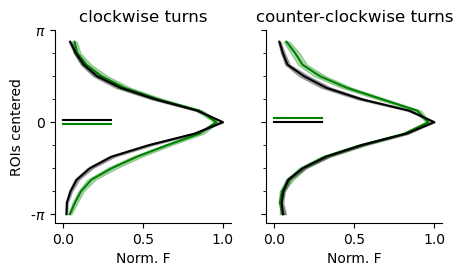

In [58]:
fig, ax = plt.subplots(1,2, figsize=[5,2.5], sharey=True)

# phases = np.arange(0, np.pi+1E-3, np.pi/8).tolist()
# phases = [-i for i in phases[-1:0:-1]] + phases
# print(len(phases))
phases = np.linspace(-np.pi, np.pi, num=l_turn_arr.shape[-1]+1)
phases = (phases[:-1]+phases[1:])/2
phases -= phases[8]
mu, sem = r_turn_arr.mean(axis=0), sp.stats.sem(r_turn_arr, axis=0)
x,y = st2p.utilities.pol2cart(mu, phases[np.newaxis,:])
pva = np.angle(x.mean(axis=-1)+1j*y.mean(axis=-1))
ax[0].plot( mu[1,:],phases, color='green')
ax[0].plot([0,.3], [pva[1], pva[1]], color='green')
ax[0].fill_betweenx(phases, mu[1,:]-sem[1,:], mu[1,:]+sem[1,:], color='green', alpha=.3)
ax[0].plot(mu[0,:], phases, color='k')
ax[0].fill_betweenx(phases, mu[0,:]-sem[0,:], mu[0,:]+sem[0,:], color='k', alpha=.3)
ax[0].plot([0,.3], [pva[0], pva[0]], color='black')
ax[0].set_title('clockwise turns')
print(pva, np.diff(pva)*180/np.pi)


mu, sem = l_turn_arr.mean(axis=0), sp.stats.sem(l_turn_arr, axis=0)
x,y = st2p.utilities.pol2cart(mu, phases[np.newaxis,:])
pva = np.angle(x.mean(axis=-1)+1j*y.mean(axis=-1))
ax[1].plot(mu[1,:], phases, color='green')
ax[1].plot([0,.3], [pva[1], pva[1]], color='green')
ax[1].fill_betweenx(phases, mu[1,:]-sem[1,:], mu[1,:]+sem[1,:], color='green', alpha=.3)
ax[1].plot(mu[0,:], phases, color='k')
ax[1].fill_betweenx(phases, mu[0,:]-sem[0,:], mu[0,:]+sem[0,:], color='k', alpha=.3)
ax[1].plot([0,.3], [pva[0], pva[0]], color='k')
ax[1].set_title('counter-clockwise turns')
print(pva, np.diff(pva)*180/np.pi)

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

    a.set_yticks([-np.pi, 0,  np.pi], 
                labels=[r'-$\pi$',  r'0', r'$\pi$'])
    a.yaxis.set_minor_locator(AutoMinorLocator())
    a.set_xlabel('Norm. F')
ax[0].set_ylabel('ROIs centered')

fig.savefig(figfolder / 'EPG_centered_turns.pdf', format='pdf')